<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_BEST_sample_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
Repetir = 40

In [3]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [4]:
#!pip install mahotas

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [10]:
# Sample7 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

In [11]:
FILE='SugarSample08.zip'

img_name=[]
x_original = [] 

data_file ='csv'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        df_ImgJ =pd.read_csv(name,sep=';' )
        if( k > 0):
          df_old = df_ImgJ.copy()
        #df_ImgJ = pd.read_excel(name)
        df_ImgJ =pd.read_csv(name,sep=';' )
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1

In [12]:
df_ImgJ.head()

,Id,Area
0,3,1.295
1,4,1.137
2,5,1.196
3,6,1.695
4,7,1.378


In [13]:
name

'Resultado8_2.csv'

In [14]:
f.namelist()

['Resultado8_4.csv', 'Resultado8_3.csv', 'Resultado8_2.csv']

In [15]:
#df_ImgJ.head()

In [16]:
#df_ImgJ.head()

In [17]:
from Segment_Filter_Revival import Segmenta  # got image provided segmented

In [18]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [19]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [20]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [21]:
Img_Size = 28

In [22]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [23]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)


Epoch 1/200
11/11 [==============================] - 4s 217ms/step - loss: 0.6404 - accuracy: 0.6851 - val_loss: 0.6933 - val_accuracy: 0.4898
Epoch 2/200
11/11 [==============================] - 1s 129ms/step - loss: 0.3285 - accuracy: 0.8601 - val_loss: 0.6930 - val_accuracy: 0.4898
Epoch 3/200
11/11 [==============================] - 1s 128ms/step - loss: 0.2261 - accuracy: 0.9067 - val_loss: 0.6934 - val_accuracy: 0.4898
Epoch 4/200
11/11 [==============================] - 1s 127ms/step - loss: 0.1514 - accuracy: 0.9300 - val_loss: 0.6932 - val_accuracy: 0.4898
Epoch 5/200
11/11 [==============================] - 1s 128ms/step - loss: 0.1328 - accuracy: 0.9446 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 6/200
11/11 [==============================] - 1s 127ms/step - loss: 0.1015 - accuracy: 0.9650 - val_loss: 0.6931 - val_accuracy: 0.4898
Epoch 7/200
11/11 [==============================] - 1s 127ms/step - loss: 0.0828 - accuracy: 0.9708 - val_loss: 0.6936 - val_accuracy: 0.4898

In [24]:
Y_test = yback(Y_test)

In [25]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.51      1.00      0.68        75

    accuracy                           0.51       147
   macro avg       0.26      0.50      0.34       147
weighted avg       0.26      0.51      0.34       147



In [27]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [29]:
Sample3 =[4,13,25]
Sample7 =[2, 5, 17]
Sample8 =[0, 3, 9]

for i in range(Repetir):
  k = 0
  for i in Sample8:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [30]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,108.709862,104.955200,103.615295,98.349518,89.703285,85.978142,85.641602,88.218658,89.486229,89.908623,93.429337,90.735641,78.034309,51.803196,49.881069,50.615997,55.008884,59.811020,64.972633,70.216354,66.496178,58.568356,49.753071,48.823643,46.586491,45.430935,50.419910,62.952888,113.401070,107.546494,101.441422,96.840523,89.441956,83.523735,83.856712,85.069870,84.945419,86.976349,88.189873,86.055824,...,64.988625,54.524624,42.013153,58.860802,84.699196,90.665779,92.571915,93.670578,94.470222,93.814224,94.912537,94.894402,53.961597,57.784180,66.965508,70.278938,65.963020,56.849068,53.246399,55.214046,56.966400,56.698669,61.262932,63.133514,66.282318,67.457069,69.398758,69.140984,67.613686,66.368538,67.492622,82.712540,91.650314,91.453682,90.927109,91.267738,92.368179,92.550583,94.353951,96.134933
1,73.099144,77.753891,77.862335,81.232803,79.033768,70.333778,69.168587,70.267395,70.834839,74.384544,75.903679,73.939629,65.959953,49.843597,41.114433,42.440647,45.500751,49.605877,50.163155,48.684628,42.636097,18.552641,36.403927,63.267395,70.691345,74.770409,79.226303,77.891609,60.998959,71.805046,76.456528,81.004738,82.107666,76.564117,65.215225,64.638870,63.866917,65.697632,66.315498,60.617752,...,0.276731,0.475138,0.389396,1.643143,4.835872,0.968713,0.487958,0.574280,0.557950,0.513629,0.617930,0.460609,5.521230,5.778548,5.772443,5.650286,5.784470,5.651140,5.294100,5.539819,5.795000,7.345991,6.246024,5.494399,5.468637,5.220842,5.473368,5.721590,5.543604,5.538354,4.916425,6.429872,8.299870,7.018223,6.486188,6.369097,5.704252,5.574220,5.826318,5.657154
2,41.460495,49.415066,57.416843,62.647861,61.106808,58.834900,50.760330,44.187923,43.919441,45.688084,46.132076,43.450413,40.919670,28.656839,17.217949,14.237562,13.405096,15.779389,25.600441,36.371410,53.474789,69.846642,77.467697,79.698616,80.989914,79.299942,79.716347,81.028473,40.894291,45.050522,45.468037,45.501499,46.567421,45.889309,44.703602,42.409527,39.853851,41.369419,42.066700,42.482216,...,0.548144,0.473684,0.147922,0.414737,0.326316,0.326316,0.459723,0.304598,0.323213,0.400776,0.474681,0.483546,5.780942,5.792909,5.613961,5.678449,6.044321,5.894736,6.069252,5.751468,5.323324,5.909696,5.673795,5.437119,6.338393,5.919557,6.005872,6.210637,6.018282,5.909695,6.145485,5.937617,5.878670,5.928310,5.774737,5.970194,5.808864,5.436565,5.381274,5.601995
3,0.595716,1.132239,2.219244,4.229687,10.236667,52.777241,71.190903,75.910172,76.722466,75.284561,72.212738,72.260590,73.864136,79.440887,84.213806,89.778305,94.761261,94.217484,89.140289,42.409290,4.411849,1.535830,0.880761,0.694177,0.431563,0.305823,0.358037,0.000000,2.016357,2.649422,3.950823,9.325748,51.906010,75.176514,80.908524,81.638870,82.522346,80.420799,75.521713,73.174110,...,71.132721,62.241680,39.661835,23.410891,27.207788,44.562466,64.131271,76.672806,80.441208,77.625076,78.995895,80.642975,69.872711,69.088547,71.772659,73.841278,76.422882,82.387711,85.027863,83.783043,77.633171,63.765411,57.271034,59.116734,59.463154,62.139275,65.563850,65.030632,63.461132,61.248756,56.555862,45.412910,49.743141,64.935959,72.927910,74.549515,76.688210,75.635406,75.384941,79.714104
4,112.570862,107.150497,99.455208,99.904541,100.492477,100.078911,101.301498,104.184410,108.159584,111.733688,115.656410,114.568108,81.812775,62.488724,58.315590,58.952953,57.064240,55.600487,56.397514,56.710033,55.229134,40.856266,31.790989,43.681293,62.278881,69.976357,73.214294,66.362785,104.358406,99.770531,103.281364,105.634796,101.652107,100.131577,99.629166,101.254646,105.816666,108.833313,112.427010,114.979813,...,105.931740,96.271828,99.413780,102.551430,101.601997,107.622917,109.761284,110.003654,112.648163,114.732811,132.292816,108.419632,100.809532,71.338722,36.424305,45.4

In [31]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [32]:
#df_ann

In [33]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [34]:
img_graos.shape

(39, 785)

In [35]:
prediction

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [36]:
img_graos.shape

(39, 785)

In [37]:
Width=np.array(Width_new)

In [38]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_Revival import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [39]:

#!git clone https://github.com/ucfilho/marquesgabi_out_2020
#%cd marquesgabi_out_2020
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

PSD_imageJ = 'Amostra8.csv' 
PSD_new = pd.read_csv(PSD_imageJ, sep=';')
print(PSD_new.head(3))
''''''

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/MarquesGabi_Routines
   Id   Area
0   1  0.807
1   2  1.407
2   3  1.177


''

In [40]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [41]:
Width.shape

(39,)

In [42]:
Width

array([137, 173, 142, 116, 155, 169, 122, 124, 154, 100, 116, 117, 145,
       108, 181, 118, 139, 153, 126, 184, 114, 128, 152, 106, 105, 103,
       104, 150, 192, 111, 140, 100, 113, 187, 181, 148, 148, 148, 115])

In [43]:
img_graos.shape

(39, 785)

In [44]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
3,137.0,0.595716,1.132239,2.219244,4.229687,10.236667,52.777241,71.190903,75.910172,76.722466,75.284561,72.212738,72.260590,73.864136,79.440887,84.213806,89.778305,94.761261,94.217484,89.140289,42.409290,4.411849,1.535830,0.880761,0.694177,0.431563,0.305823,0.358037,0.000000,2.016357,2.649422,3.950823,9.325748,51.906010,75.176514,80.908524,81.638870,82.522346,80.420799,75.521713,...,71.132721,62.241680,39.661835,23.410891,27.207788,44.562466,64.131271,76.672806,80.441208,77.625076,78.995895,80.642975,69.872711,69.088547,71.772659,73.841278,76.422882,82.387711,85.027863,83.783043,77.633171,63.765411,57.271034,59.116734,59.463154,62.139275,65.563850,65.030632,63.461132,61.248756,56.555862,45.412910,49.743141,64.935959,72.927910,74.549515,76.688210,75.635406,75.384941,79.714104
6,173.0,81.131500,75.640846,61.998959,43.302113,33.867722,33.612984,27.810953,14.503793,51.780277,75.922081,78.112198,70.862236,60.116009,63.748268,68.074173,69.669350,72.664070,75.040894,76.325699,78.059601,79.280663,77.941833,81.608871,65.214073,48.602654,48.858925,47.465305,46.559357,84.650703,83.546150,75.707672,49.696846,32.586823,30.325872,28.481472,22.181963,60.676331,76.195992,80.390381,...,61.377594,62.391529,58.470142,47.625412,35.660461,30.379766,31.125095,33.551369,35.184334,72.206352,107.587456,108.467323,37.046974,39.170670,56.279091,73.720497,77.394592,71.233215,58.819405,51.939857,48.450729,47.268131,48.578796,51.477261,51.686184,54.496037,57.723976,59.124428,63.128273,59.550804,53.979118,43.927994,35.275818,31.798723,30.719402,34.966785,33.573524,36.182766,62.849709,90.741524
7,142.0,90.596710,82.182907,82.929184,87.339027,80.162071,61.765724,43.030750,43.709583,56.572906,68.398331,74.517159,80.983337,86.500099,91.577271,96.642136,98.568733,103.884346,109.710587,107.489388,100.699463,97.295578,100.087486,102.170601,100.148392,91.840515,85.717911,85.598091,85.267601,90.799049,83.051773,82.321762,82.695107,79.860939,66.919067,46.010715,47.087090,57.377903,70.718109,76.606026,...,57.564774,52.920853,52.896053,55.845863,56.075584,56.272369,55.432854,58.244595,61.977390,68.418961,71.007141,53.777626,55.214447,48.977585,53.149380,55.142231,61.048599,64.761353,65.611000,69.663757,68.283081,64.876610,63.497124,63.028172,62.546318,60.530453,59.491375,58.936718,59.086693,56.420158,54.289825,55.091652,56.566750,56.055748,56.335457,59.091652,63.197784,67.340607,70.611588,57.530457
12,116.0,107.834724,110.474434,114.189064,118.305595,119.686081,116.135551,108.045181,93.585014,90.771698,91.694405,92.759804,96.391205,100.127228,102.608795,103.567169,104.412590,105.470856,106.575493,108.045181,110.476807,104.076088,77.565994,66.776459,68.011887,69.803802,69.357910,70.994057,70.020218,107.429260,110.034477,113.942924,117.582642,117.321045,111.556480,101.039238,96.663498,96.221161,96.996437,98.099876,...,65.815697,65.304398,66.307968,68.464920,70.717003,71.785973,72.626633,76.017838,78.903687,80.730087,81.073715,81.599281,79.244949,78.988106,80.463730,80.192627,78.570747,77.400711,76.066582,78.122475,79.172409,79.450653,77.711052,73.821640,72.146255,70.143875,68.204514,67.252083,66.265160,64.541023,64.575500,66.533890,69.929840,71.442329,72.678955,75.233055,78.846611,81.181923,81.462540,82.291313
15,155.0,51.145020,44.295483,40.929073,38.152637,38.282211,43.270096,49.259521,53.698822,54.151264,50.364788,46.461647,46.832924,49.033054,50.557129,53.293945,55.013992,57.276012,57.856735,58.128284,61.649620,61.800129,58.645584,48.779232,37.197212,29.732698,30.666889,32.533573,34.617653,36.630638,35.028469,35.131115,37.283375,45.135483,51.529076,51.927414,53.875969,53.258106,51.257942,49.235920,...,79.930992,78.464264,79.902359,80.342651,81.588188,81.009041,80.346062,74.359703,72.499229,74.5

In [45]:
PSD_new['Area']

0     0.807
1     1.407
2     1.177
3     1.289
4     1.743
      ...  
94    2.097
95    1.871
96    1.315
97    1.034
98    2.095
Name: Area, Length: 99, dtype: float64

In [46]:
 df_ImgJ

,Id,Area
0,3,1.295
1,4,1.137
2,5,1.196
3,6,1.695
4,7,1.378
...,...,...
66,33,0.779
67,34,2.245
68,35,1.594
69,36,1.334


In [47]:
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]



In [48]:
len(Diameter_All)

39

In [49]:
#

#PSD_new['Area'].shape

In [50]:
#PSD_new.iloc[:,0]

In [51]:
Area2 = PSD_new['Area'].values
#k = 0
for A in Area2:
  Diam1.append((4*A/np.pi)**0.5)
  #k = k + 1 


In [52]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [53]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169
0,1.284074,1.203193,1.234016,1.469061,1.324584,1.143511,1.085827,0.961443,1.274119,1.075222,1.113614,1.211104,1.448990,1.332252,1.408893,1.533101,1.175357,1.889488,1.284074,1.236592,1.076996,1.380133,1.035407,1.074629,1.468194,1.269615,1.576504,1.450307,1.334639,1.220529,0.995918,1.690687,1.424621,1.303266,1.031094,1.019920,1.284074,1.203193,1.234016,1.469061,...,1.016168,0.937302,1.493558,1.115898,1.18775,1.209526,1.124989,1.424621,1.378286,1.297391,1.411151,1.281592,1.160092,1.232467,1.341301,1.371341,1.677456,1.271619,1.540971,1.176981,1.717214,1.536834,1.059716,1.421489,1.169928,1.66565,1.492279,1.103852,1.25651,1.421041,1.78662,1.540558,1.277114,1.649519,1.277612,1.634008,1.543448,1.293951,1.147401,1.633229
1,0.662251,1.263667,0.920929,0.812586,1.094367,1.113654,0.650500,0.756222,1.048384,0.658967,0.645458,0.946382,1.013715,0.735230,1.401732,0.820010,1.031856,0.908326,0.669523,1.508129,0.640285,0.826281,1.087759,0.689044,0.604122,0.887178,0.668209,1.252402,1.405008,0.699599,0.947050,0.711538,0.819354,1.254177,1.041392,1.254544,1.083027,0.883483,0.738885,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
len(Diameter_All)

39

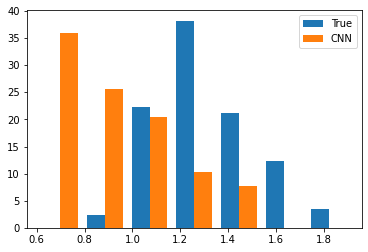

In [55]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [56]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.322160502180401 desvio= 0.21250795161823166 pontos= 170


In [57]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 0.9270571199232881 desvio= 0.24331472523320458 pontos= 39
